## Васильев Семён. 520 группа

In [2]:
data <- read.csv('var_3_10.csv',header = T)
head(data)

X1,X2,X3,X4
-16.29388,-17.12232,-13.87925,-14.72736
-15.76859,-12.61426,-21.47402,-16.58184
-21.49140,-15.07518,-14.66399,-20.97362
-15.34334,-14.45387,-18.36571,-22.24514
-15.31698,-16.01865,-12.49104,-19.11881
-15.03503,-16.53577,-11.10544,-17.18696


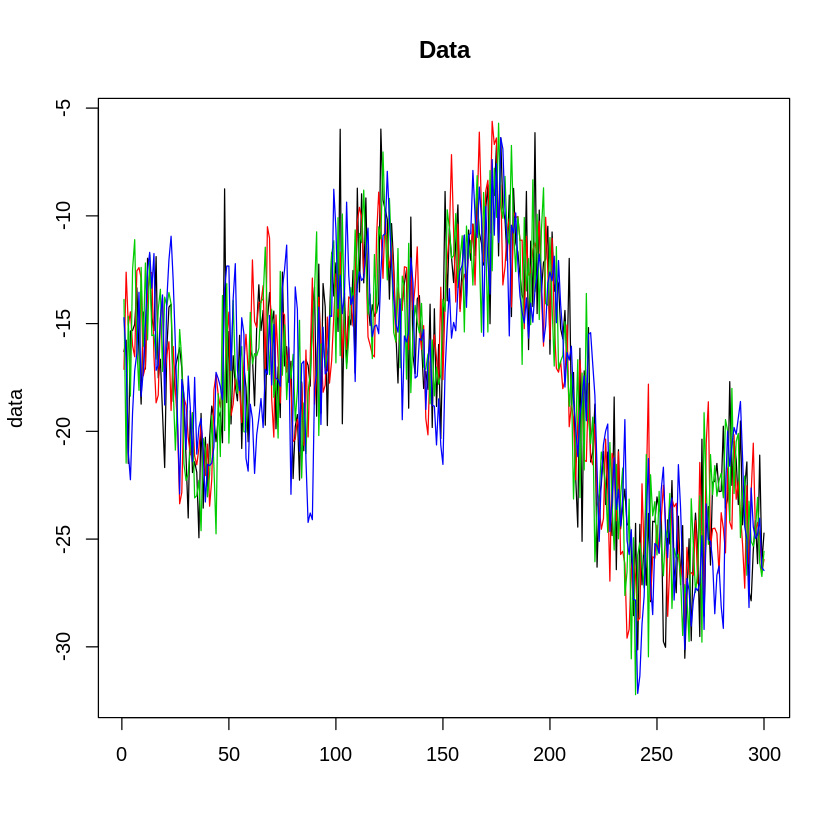

In [3]:
matplot(data,type = "l",lty = 1,col = 1:dim(data)[2],main = "Data") 

In [4]:
library(urca)

In [5]:
vecm <- ca.jo(data, ecdet = "none",type="eigen",K=2,spec="longrun")

In [7]:
summary(vecm)


###################### 
# Johansen-Procedure # 
###################### 

Test type: maximal eigenvalue statistic (lambda max) , with linear trend 

Eigenvalues (lambda):
[1] 0.51731956 0.36681857 0.24600635 0.00947997

Values of teststatistic and critical values of test:

           test 10pct  5pct  1pct
r <= 3 |   2.84  6.50  8.18 11.65
r <= 2 |  84.15 12.91 14.90 19.19
r <= 1 | 136.19 18.90 21.07 25.75
r = 0  | 217.06 24.78 27.14 32.14

Eigenvectors, normalised to first column:
(These are the cointegration relations)

            X1.l2      X2.l2     X3.l2    X4.l2
X1.l2  1.00000000  1.0000000  1.000000 1.000000
X2.l2  0.75521512 -0.7337581  1.340278 2.565008
X3.l2 -1.78916628 -0.1514633  1.150902 3.906182
X4.l2  0.04941115 -0.1027355 -3.626744 1.320826

Weights W:
(This is the loading matrix)

          X1.l2       X2.l2         X3.l2        X4.l2
X1.d -0.3518263 -0.73694601  0.0008621843 -0.001264059
X2.d -0.3437421  0.42645329 -0.0121041256 -0.003193440
X3.d  0.5494216 -0.116705

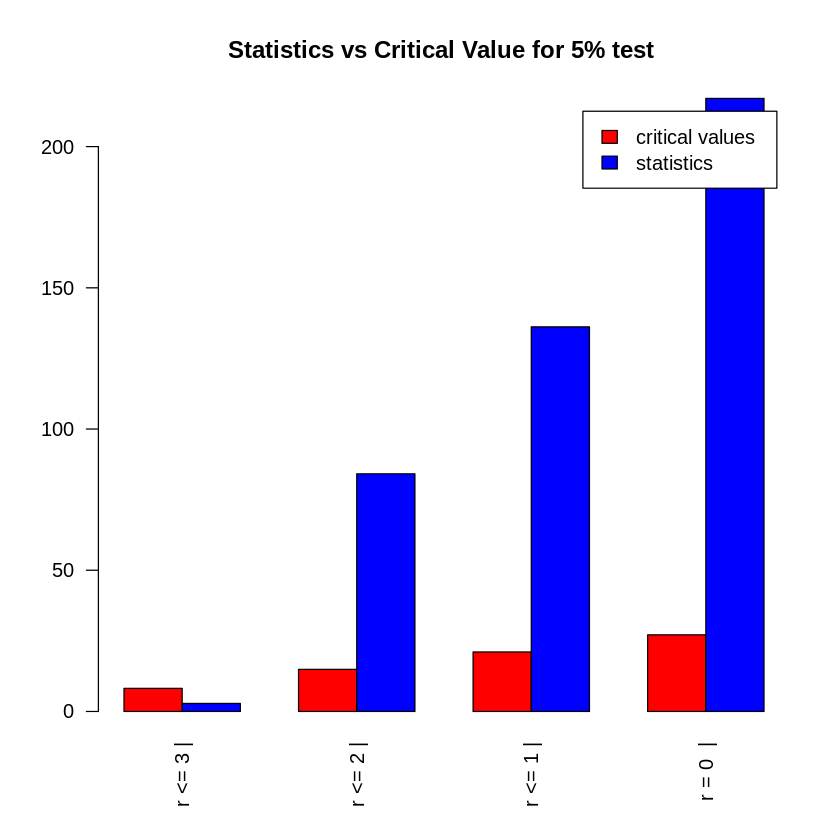

In [8]:
outmat <-rbind(vecm@cval[,2],vecm@teststat)
legends <- c("critical values","statistics")
barplot(outmat, main="Statistics vs Critical Value for 5% test ",legend.text = legends,beside = TRUE, col=c("red","blue"), las=2)

In [9]:
vecm@V

,X1.l2,X2.l2,X3.l2,X4.l2
X1.l2,1.00000000,1.0000000,1.000000,1.000000
X2.l2,0.75521512,-0.7337581,1.340278,2.565008
X3.l2,-1.78916628,-0.1514633,1.150902,3.906182
X4.l2,0.04941115,-0.1027355,-3.626744,1.320826


In [11]:
dataM <- as.matrix(data)

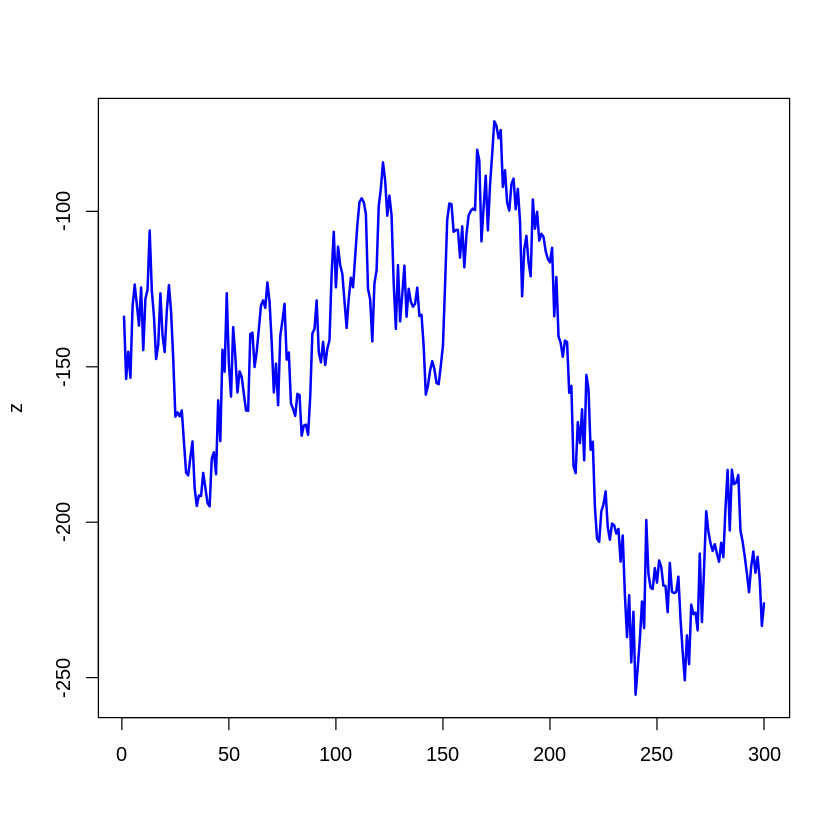

In [31]:
z <- dataM%*%vecm@V[,4]
matplot(z,type ="l",col = "blue",lwd = 2)

In [32]:
library(urca)

In [33]:
summary(ur.kpss(z))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 1.8379 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


In [35]:
variant <- 3
lambda <- vecm@lambda
h <- 3

In [34]:
z1 <- dataM%*%vecm@V[,1]
z2 <- dataM%*%vecm@V[,2]
z3 <- dataM%*%vecm@V[,3]
z <- cbind(z1, z2, z3)

In [38]:
res <- list(   variant = variant,
               lambda=lambda,
               h = h,
               z = z)
saveRDS(res,"result.rds")

In [39]:
res

-5.1203270,-0.11501505,-1.8038422
12.3061972,-1.55670425,2.7483822
-7.6764103,-6.05406672,17.4928159
5.5010212,0.32939440,24.8247859
-6.0106420,0.29294730,18.1766601
-8.5028300,0.54600110,12.3538694
5.1469013,-0.01314144,10.6992641
5.9864650,-3.12592722,-4.6849501
-7.2048609,-5.51464759,16.3735776
0.2624377,2.52403419,6.1593451
-8.8670764,-1.26016190,0.6945240
